In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [2]:
df= pd.read_csv('data.csv')

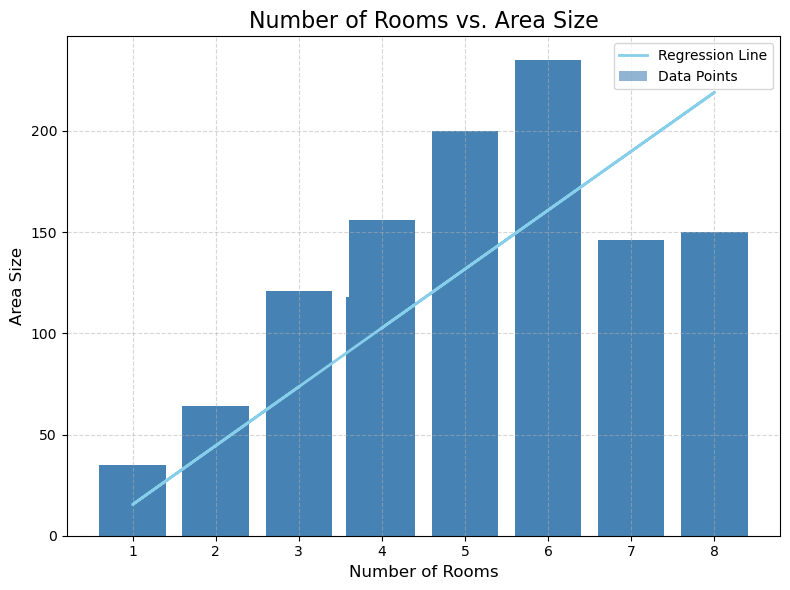

In [3]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[['area_size', 'rooms']]), columns=['area_size', 'rooms'])

# Create feature matrix X and target variable y
X = np.array(df_imputed['rooms'])
y = np.array(df_imputed['area_size'])

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X[:, np.newaxis], y)

# Get the predicted values
y_pred = model.predict(X[:, np.newaxis])

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(X, y, color='#4682B4', alpha=0.6)
plt.plot(X, y_pred, color='#87CEEB', linewidth=2)  # Plot the regression line
plt.title('Number of Rooms vs. Area Size', fontsize=16)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Area Size', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Regression Line', 'Data Points'], loc='upper right')
plt.tight_layout()
plt.show()


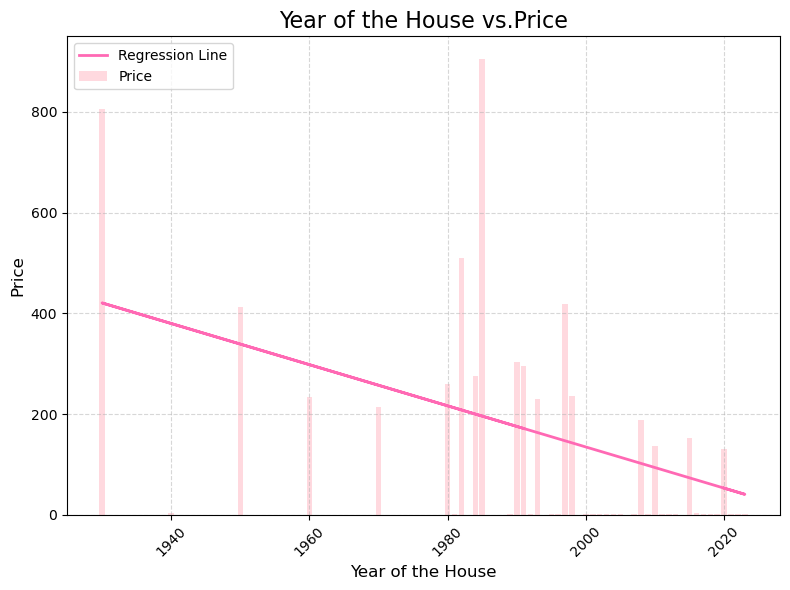

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Remove rows with missing values
df = df.dropna()

# Convert data types
df['year'] = df['year'].astype(int)
df['price'] = df['price'].astype(float)

# Create feature matrix X and target variable y
X = df['year'].values.reshape(-1, 1)
y = df['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the predicted values
y_pred = model.predict(X)

# Calculate the mean price for each year
mean_prices = df.groupby('year')['price'].mean()

# Create a bar chart
years = mean_prices.index
prices = mean_prices.values

plt.figure(figsize=(8, 6))
plt.bar(years, prices, color='pink', alpha=0.6)
plt.plot(X, y_pred, color='hotpink', linewidth=2)  # Plot the regression line
plt.title('Year of the House vs.Price', fontsize=16)
plt.xlabel('Year of the House', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Regression Line', 'Price'], loc='upper left')
plt.tight_layout()
plt.show()


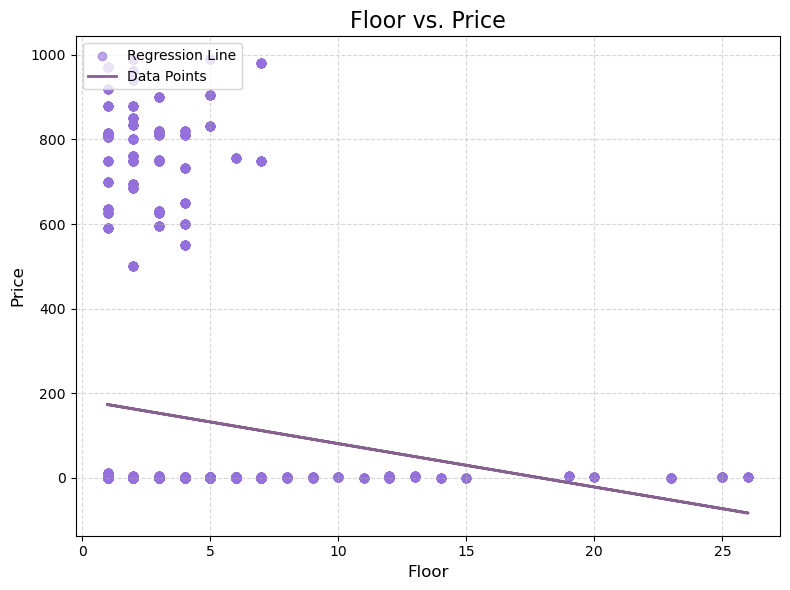

In [5]:
def create_floor_vs_price_plot(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Remove rows with missing values
    df = df.dropna()

    # Convert data types
    df['floor'] = df['floor'].astype(int)
    df['price'] = df['price'].astype(float)

    # Create feature matrix X and target variable y
    X = df['floor'].values.reshape(-1, 1)
    y = df['price']

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get the predicted values
    y_pred = model.predict(X)

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df['floor'], df['price'], color='#9370DB', alpha=0.6)
    plt.plot(X, y_pred, color='#86608E', linewidth=2)  # Plot the regression line

    # Set plot title and labels
    plt.title('Floor vs. Price', fontsize=16)
    plt.xlabel('Floor', fontsize=12)
    plt.ylabel('Price', fontsize=12)

    # Set tick label font size
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Set grid style
    plt.grid(True, linestyle='--', alpha=0.5)

    # Add legend
    plt.legend(['Regression Line', 'Data Points'], loc='upper left')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Call the function with the provided code
create_floor_vs_price_plot(df)
